In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
from typing import List

In [27]:
red_wines = pd.read_csv("dataset/winequality-red.csv", sep=";")
white_wines = pd.read_csv("dataset/winequality-white.csv", sep=";")

In [28]:
red_wines["wine_type"] = "red"
white_wines["wine_type"] = "white"

In [29]:
def encode_quality(quality):
    if quality < 5:
        return "low"
    elif quality < 7:
        return "medium"
    return "high"


red_wines["quality_label"] = pd.Categorical(red_wines["quality"].apply(encode_quality), categories=["low", "medium", "high"], ordered=True)
white_wines["quality_label"] = pd.Categorical(white_wines["quality"].apply(encode_quality), categories=["low", "medium", "high"], ordered=True)

In [30]:
wines = pd.concat([red_wines, white_wines], ignore_index=True)
wines = wines.sample(frac=1, random_state=42)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
3103,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1419,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,medium
4761,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,high
4690,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4032,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [132]:
def concat_described(data_frames: List[pd.DataFrame], subset_attributes : List[str], keys: List[str], drop_count = True):
    assert len(data_frames) == len(keys), "Number of data frames and keys should be equal"
    
    described_dfs = []
    for df in data_frames:
        described_dfs.append(df[subset_attributes].describe().drop("count") if drop_count else df[subset_attributes].describe())
        
    
    multi_level_data = {}
    
    for attr in subset_attributes:
        attr_data = pd.DataFrame()
        for i, key in enumerate(keys):
            attr_data[key] = described_dfs[i][attr]
            
        multi_level_data[attr] = attr_data
        
    return pd.concat(multi_level_data, axis=1)

In [130]:
concat_described(data_frames = [wines.where(wines["wine_type"] == "red"), 
                                wines.where(wines["wine_type"] == "white")], 
                 subset_attributes=["residual sugar", "total sulfur dioxide", "sulphates", "alcohol", "volatile acidity", "quality"],
                 keys=["red", "white"],
                 drop_count=True).style.set_sticky()

In [131]:
concat_described(data_frames = [wines.where(wines["quality_label"] == "low"), 
                                wines.where(wines["quality_label"] == "medium"),
                                wines.where(wines["quality_label"] == "high")], 
                 subset_attributes=["alcohol", "volatile acidity", "pH", "quality"],
                 keys=["quality low", "quality medium", "quality high"],
                 drop_count=False)

,alcohol,alcohol,alcohol,volatile acidity,volatile acidity,volatile acidity,pH,pH,pH,quality,quality,quality
,quality low,quality medium,quality high,quality low,quality medium,quality high,quality low,quality medium,quality high,quality low,quality medium,quality high
count,246.0000,4974.0000,1277.0000,246.0000,4974.0000,1277.0000,246.0000,4974.0000,1277.0000,246.0000,4974.0000,1277.0000
mean,10.1843,10.2653,11.4334,0.4652,0.3464,0.2892,3.2348,3.2153,3.2277,3.8780,5.5702,7.1590
std,0.9990,1.0706,1.2156,0.2457,0.1657,0.1170,0.1913,0.1595,0.1591,0.3279,0.4951,0.3763
min,8.0000,8.0000,8.5000,0.1100,0.0800,0.0800,2.7400,2.7200,2.8400,3.0000,5.0000,7.0000
25%,9.4000,9.4000,10.7000,0.2800,0.2300,0.2000,3.0900,3.1100,3.1200,4.0000,5.0000,7.0000
50%,10.0500,10.0000,11.5000,0.3800,0.3000,0.2700,3.2250,3.2000,3.2200,4.0000,6.0000,7.0000
75%,10.9000,11.0000,12.4000,0.6100,0.4200,0.3400,3.3600,3.3200,3.3400,4.0000,6.0000,7.0000
max,13.5000,14.9000,14.2000,1.5800,1.3300,0.9150,3.9000,4.0100,3.8200,4.0000,6.0000,9.0000


### I am unable to properly display multi collumns without using df.style.set_sticky(). Why?

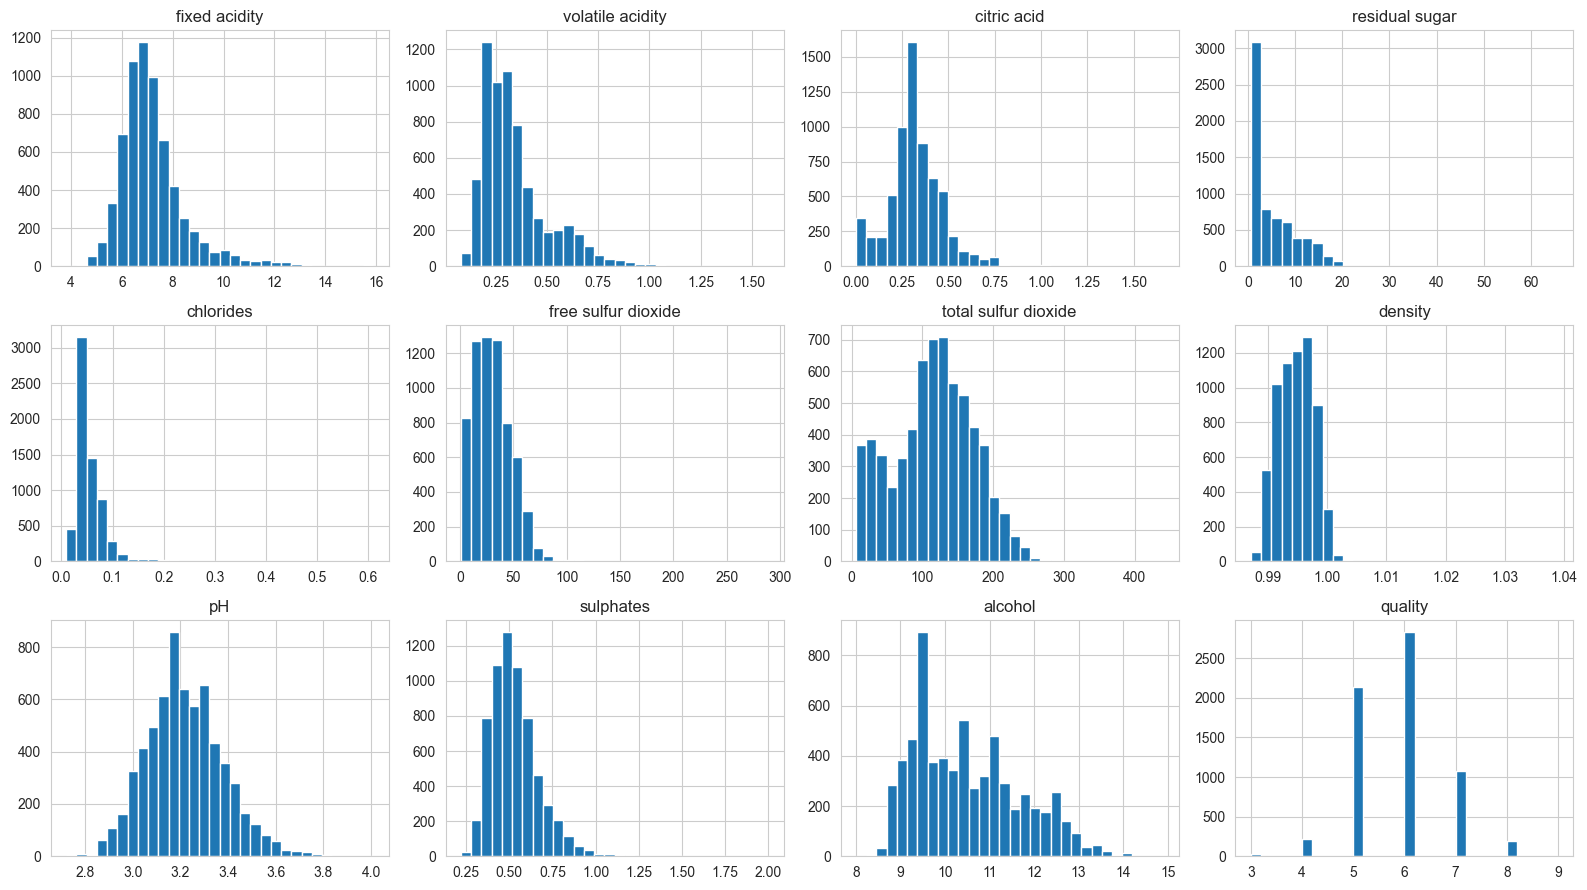

In [291]:
numeric_columns = wines.select_dtypes(include=[np.number])

n_cols = 4
n_rows = int(np.ceil(len(numeric_columns.columns) / n_cols))

numeric_columns.hist(bins=30, figsize=(16, n_rows * 3), layout=(n_rows, n_cols))
plt.tight_layout()
plt.show()

Most of the histograms are unsurprising.

There are very few bad or excellent wines, with most being of medium quality.

The only charts that show multimodal distributions are those for citric acid, total sulfur dioxide, and alcohol.\
Citric acid levels are mostly around 0.3, but there is a small spike in wines containing nearly 0 citric acid, similar to total sulfur dioxide.\
The alcohol chart is particularly interesting, as it features multiple distinct peaks. Maybe this could indicate that wineries tend to use certain grape varieties more frequently rather than blending different species together? I am just guessing.

The charts for fixed acidity and volatile acidity appear to be slightly correlated.\
On the volatile acidity chart, we can see that most wines have a value around 0.2, but some wines have levels five times higher

The rest of charts are skewed left or right. I would not call any chart normal, even tho some of them are close

One wine has alcohol at 14.9%. I would count it as outlier



In [318]:
central_tendency_measures = pd.DataFrame({
    "mean" : numeric_columns.mean(),
    "median" : numeric_columns.median(),
    "mode" : numeric_columns.mode().iloc[0]
})
display(central_tendency_measures)

,mean,median,mode
fixed acidity,7.2153,7.0000,6.8000
volatile acidity,0.3397,0.2900,0.2800
citric acid,0.3186,0.3100,0.3000
residual sugar,5.4432,3.0000,2.0000
chlorides,0.0560,0.0470,0.0440
free sulfur dioxide,30.5253,29.0000,29.0000
total sulfur dioxide,115.7446,118.0000,111.0000
density,0.9947,0.9949,0.9972
pH,3.2185,3.2100,3.1600
sulphates,0.5313,0.5100,0.5000


Residual sugars are interesting. Even tho mode is at 2.0 the mean and median are higher. Moreover mean is higher, then median so there are probalby wines, that contain lots of residual sugars (we can confirm it looking at the chart). \
I don't see anything more on this table, that is worth mentioning

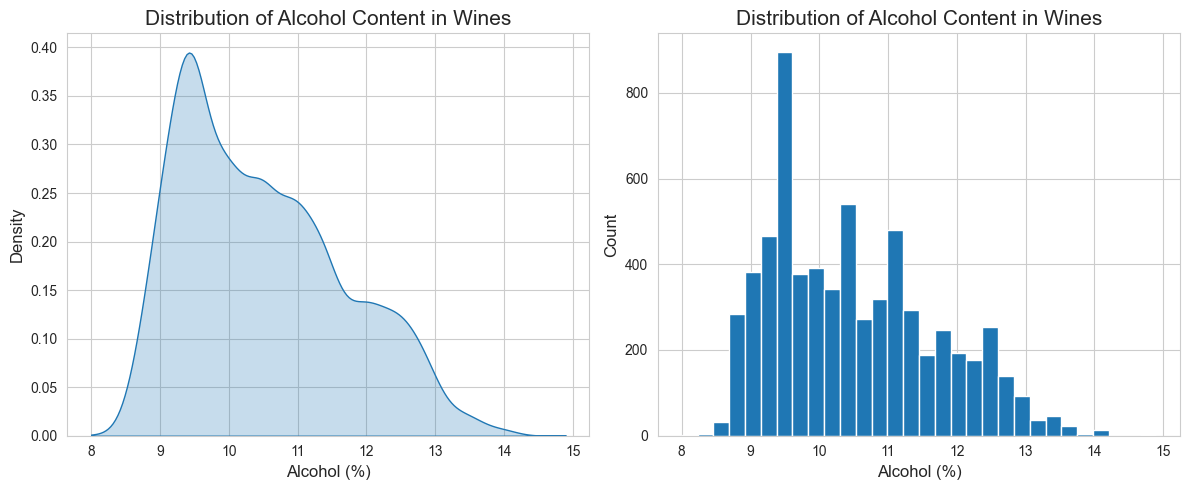

In [194]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.kdeplot(wines["alcohol"], fill = True, ax=axes[0], cut=0)

axes[0].set_title("Distribution of Alcohol Content in Wines", fontsize=15)
axes[0].set_xlabel("Alcohol (%)", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)

wines["alcohol"].hist(bins=30, ax=axes[1])

axes[1].set_title("Distribution of Alcohol Content in Wines", fontsize=15)
axes[1].set_xlabel("Alcohol (%)", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [193]:
print(f"Median for alcohol: {wines['alcohol'].median():.2f}")
print(f"Mean for alcohol: {wines['alcohol'].mean():.2f}")
print(f"Range of alcohol is from {wines['alcohol'].min():.2f} to {wines['alcohol'].max():.2f}")

Median for alcohol: 10.30
Mean for alcohol: 10.49
Range of alcohol is from 8.00 to 14.90


Wine with alcohol 14.9% is an interesting outlier. I wonder how abv correlates with quality.

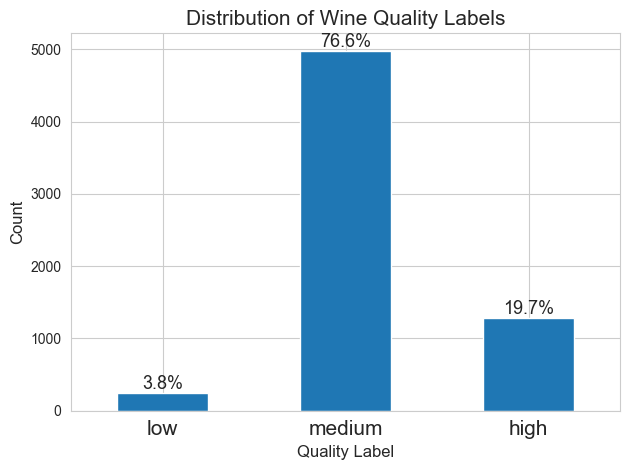

In [253]:
quality_counts = wines["quality_label"].value_counts().sort_index()
quality_counts.plot.bar()

for i, quantity in enumerate(quality_counts):
    plt.text(i, quality_counts.iloc[i], f"{(quantity / quality_counts.sum()) * 100:.1f}%", ha="center", va="bottom", fontsize=13)

plt.title("Distribution of Wine Quality Labels", fontsize=15)
plt.xlabel("Quality Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0, fontsize=15)

plt.tight_layout()
plt.show()

Dataset is not balanced, but there is no tragedy. Medium quality wines take over 3/4 of whole dataset. Low quality wines are below 4%.

<Axes: >

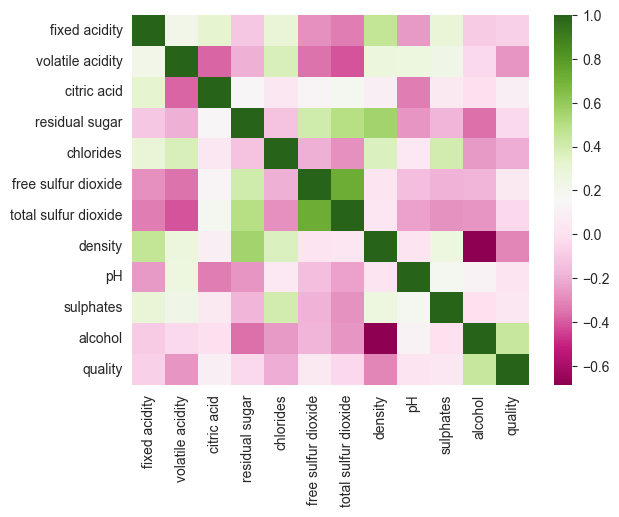

In [325]:
sns.heatmap(numeric_columns.corr(), cmap="PiYG")

Total sulfur dioxide and free sulfur dioxide are strongly correlated. (probably it is obvious because of science) \
Density and residual sugar are correlated. \
Alcohol and density are strongly negatively correlated (alcohol is very light) \
Alcohol and quality are slightly correlated 🥳

In [332]:
wine_subset = wines[["density", "residual sugar", "total sulfur dioxide", "fixed acidity", "wine_type"]]

<Figure size 1200x1000 with 0 Axes>

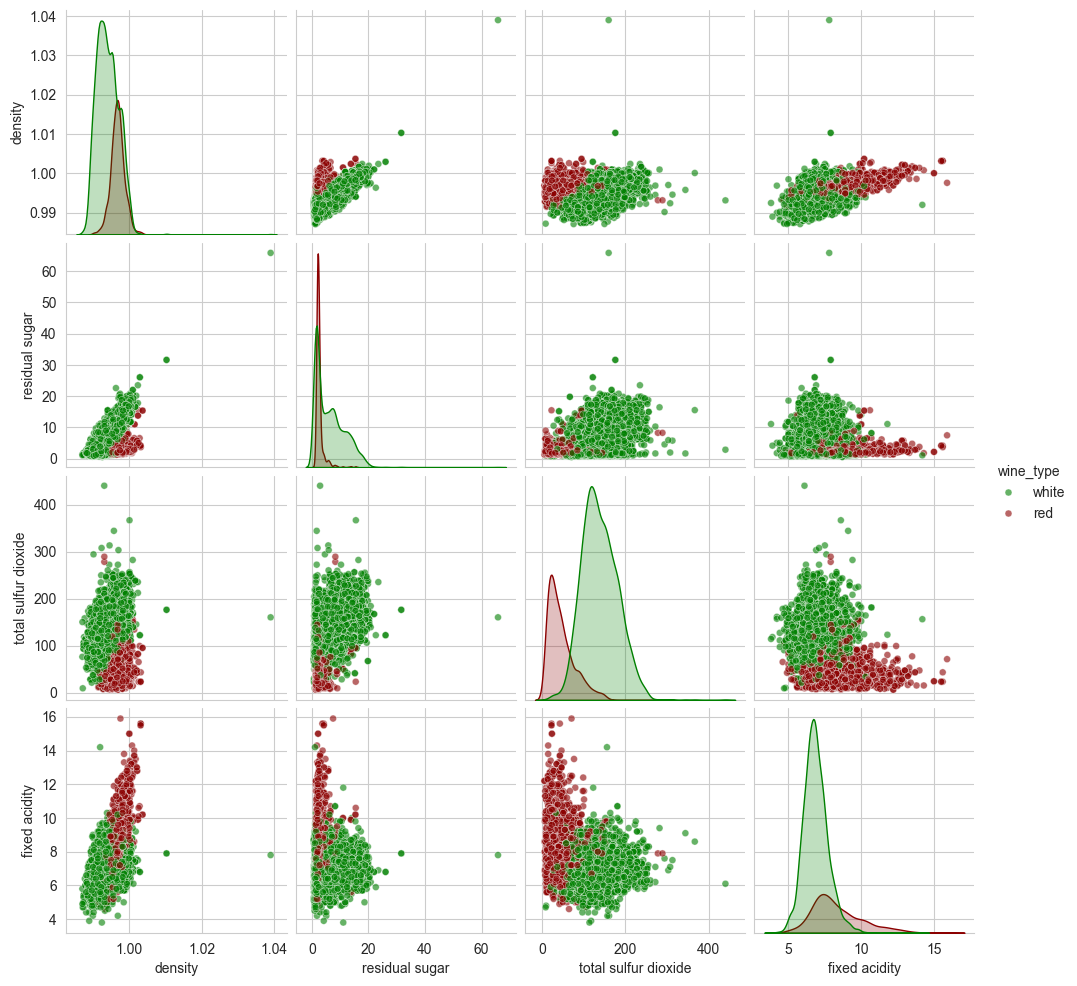

In [334]:
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(wine_subset, 
                        hue="wine_type", 
                        palette={"red": "darkred", "white": "green"},
                        diag_kind="kde",
                        plot_kws={"alpha": 0.6, "s": 25},
                        height=2.5)

I think that fixed acidity and total sulfur dioxide (from now on TSD) are good at separating wine types. TSD shows that red wines chart meets white wines chart from its right side, but from fixed acidity chart we can see that right part of tail in red wines charts is mostly free from white wines. \
TSD and fixed acidity are slightly negatively correlated, but I think we can use them to predict wine type.